# Diabetes prediction model 

### Since we know that diabetes is a type of chronic disease that is common among peoples of all age group.
### Predciting the disease at the early stage can help the person to take necessary precautions and change 
### their lifestyles accordingly to either prevent the disease or control the disease.

## Task1 : Prepare the data set using the several methods to train the model
## Task2 : Build a model with high accuracy of predicting the disease.

## Dataset is of taken from  [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
### This dataset contians over 700 sample of different features important to diagonise diabetes, such as
### Blood pressure level, Insulin, Skin_Thickness etc. and returns outcome whether diabetes or not. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

### Using pandas library to get data from the csv file to pandas dataframe

In [2]:
## Taking Data in dataframe
Data = pd.read_csv('diabetes.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### columns of the Dataset are as given below

In [3]:
Data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Function to get overview of the dataset it's shape, columns, data missing

In [4]:
def Print_data_overview(Dataframe):
    print('Shape :  ',Dataframe.shape)
    print('Columns :  ',Dataframe.columns)
    print('Data-missing :  ',Dataframe.isnull().sum().values.sum())

In [5]:
Print_data_overview(Data)

Shape :   (768, 9)
Columns :   Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Data-missing :   0


### In the Csv file 'Outcome' feature is the label

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

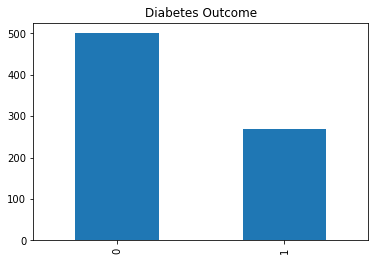

In [6]:
print(Data.Outcome.value_counts())
Data['Outcome'].value_counts().plot(kind = 'bar').set_title('Diabetes Outcome')

### So among the data, 500 data is having no diabetes, 268 data is diabetes.

### Trying to get correlation

In [7]:
Correlation = Data.corr()
Correlation['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Also we can observe corelation with scatter plot

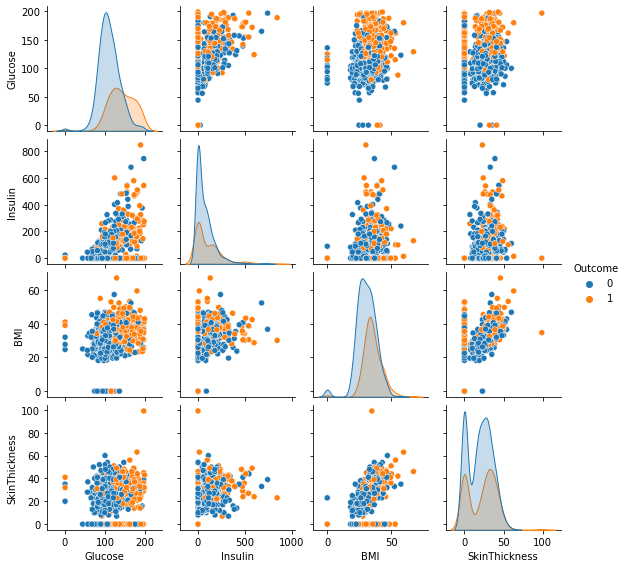

In [8]:
import seaborn as sns
## Drawing plot of some highly correlated features
sns.pairplot(Data.dropna(), vars = ['Glucose', 'Insulin','BMI','SkinThickness'], height= 2.0, diag_kind='kde', hue='Outcome')

### some values may be missing , some may be zero. so to maintain uniformity we will change 0 or Null to median

In [9]:
## We will impute features value with median if it is zero
Data_Features = Data.drop('Outcome', axis = 1)
Data_Labels = Data['Outcome']

## Now we will replace the 0 values with Nan then with median

In [10]:
## Function to do this job
def Impute(Dataframe, Features):
    for feature in Features:
        Dataframe[feature].replace(0, np.nan, inplace = True)
        Dataframe[feature].replace(np.nan, Dataframe[feature].median(), inplace = True)
    

In [11]:
Features_list = Data_Features.columns.tolist()
Impute(Data_Features, Features_list)

## So now we are ready to work on data

### Now we will split the dataset in two parts one for training and other for testing.

### Splitting the dataset in training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_Features, Data_Labels, test_size=.2, random_state=42, stratify=Data_Labels)

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1.0,146.0,56.0,29.0,125.0,29.7,0.564,29
682,4.0,95.0,64.0,39.0,105.0,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2.0,134.0,70.0,29.0,125.0,28.9,0.542,23
113,4.0,76.0,62.0,29.0,125.0,34.0,0.391,25
556,1.0,97.0,70.0,40.0,125.0,38.1,0.218,30
667,10.0,111.0,70.0,27.0,125.0,27.5,0.141,40


## Now we will train the data to some classifier models and check for accuracy among them

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()

## Below is the function to apply various models on the training dataset and  storing , Accuracy, Precison etc in Dataframe to compare easily.

In [15]:
Kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
def Model_Selection(Model,Data_list, name):
    Model.fit(Data_list[0],Data_list[2])
    y_Pred = Model.predict(Data_list[1])
    Accuracy = np.mean(cross_val_score(Model, Data_list[0],Data_list[2], cv = Kf, scoring='accuracy'))
    f1Score = np.mean(cross_val_score(Model, Data_list[0],Data_list[2], cv = Kf, scoring='f1'))
    Precision = np.mean(cross_val_score(Model, Data_list[0],Data_list[2], cv = Kf, scoring='precision'))
    
    Logloss = log_loss(Data_list[3], y_Pred)
    
    frame = pd.DataFrame({'Model': [name], 'Accuracy': [Accuracy], 'f1Score': [f1Score], 'Precision': [Precision], 'Logloss': [Logloss]})
    return frame


In [16]:
## Datafrae containg all models accuracy , precision etc data is output
Data_list = [X_train, X_test, y_train, y_test]
Model_data = pd.concat([
                       Model_Selection(model2, Data_list, 'KNeighborsClassifier'),
                       Model_Selection(model3, Data_list, 'GaussianNB'),
                       Model_Selection(model4, Data_list, 'DecisionTreeClassifier'),
                       Model_Selection(model5, Data_list, 'RandomForestClassifier')],axis = 0).reset_index()

Model_data

,index,Model,Accuracy,f1Score,Precision,Logloss
0,0,KNeighborsClassifier,0.745862,0.615060,0.651547,10.765447
1,0,GaussianNB,0.759003,0.633745,0.679065,10.316912
2,0,DecisionTreeClassifier,0.672638,0.535838,0.541941,11.438270
3,0,RandomForestClassifier,0.747541,0.624150,0.676839,9.644043


## So the above dataframe shows the accuracy and other variables of the data. using cross-validation

### Clearly it is visible that RandomForestClassifier is best fit model for our problem

## Now using RandomForestClassifer for our problem

In [17]:
Model = RandomForestClassifier()
Model.fit(X_train, y_train)

RandomForestClassifier()

### Lets take some data from the main file and predict the output

In [18]:
some_data = Data_Features.iloc[:5]
some_labels = Data_Labels.iloc[:5]
Model.predict(some_data)

array([1, 0, 1, 0, 1])

In [19]:
list(some_labels)

[1, 0, 1, 0, 1]

## The output above shows that our model is doing good

### Now time for using our testing data that we split earlier

In [20]:
Pred = Model.predict(X_test)
print(Pred)

[1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0]


In [21]:
print(list(y_test))

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]


## So we are done with our model now we will save our model

## Saving the model

In [22]:
from joblib import dump, load
dump(Model, 'Diabetes_predictor.joblib')

['Diabetes_predictor.joblib']

## Model is saved as Diabetes_predictor.joblib

## Using the model

In [23]:
## Function to use model to predict whether a person has diabetes or not
def Main():
    Preg = float(input("Enter the value of Pregnancies: "))
    Glu = float(input("Enter the value of Glucose: "))
    BP = float(input("Enter the value of Blood Pressure: "))
    Skin_Thick = float(input("Enter the value of SkinThickness: "))
    Ins = float(input("Enter the value of Insulin: "))
    BMI = float(input("Enter the value of BMI: "))
    DiabPed = float(input("Enter the value of DiabetesPedigreeFunction: "))
    Age = float(input("Enter the value of Age: "))
    
    
    from joblib import dump, load
    model = load('Diabetes_predictor.joblib')

    Val = model.predict(np.array([[Preg, Glu, BP, Skin_Thick, Ins, BMI, DiabPed, Age]]))
    if(Val[0] == 1):
        print('Yes', 'Model Predicted the diabetes')
    else:
        print('No', 'Model predicted no diabetes')
    

## Lets Run the function and test our model for data provided by user

In [24]:
Main()

ValueError: could not convert string to float: ''

In [ ]:
from joblib import dump, load
model = load('Diabetes_predictor.joblib')
input = np.array([[6,148,72,35,0,33.6,0.627,50]])
Arr = model.predict(input)
Arr[0]

0